In [587]:
# Simple genetic algorithm example using Goldberg's monography
# "Genetic Algorithms in Search, Optimization and Machine Learning"
import numpy as np
import matplotlib.pyplot as plt
import math

In [588]:
# Fitness function for optimization
def fitness(_x):
    return _x**2

In [589]:
# Generate first population
def generate_population(X, population_power=4):
    new_population = []
    for chromosome in np.random.randint(low=1, high=X[-1], size=population_power):
        new_population.append([chromosome, fitness(chromosome)])
    return np.array(new_population)

In [590]:
def cross(chrome1, chrome2, k):
    new_chrome1 = chrome1[:k] + chrome2[k:]
    new_chrome2 = chrome2[:k] + chrome1[k:]
    return new_chrome1, new_chrome2

In [591]:
def invert(binary_in_str, k):
    inverted_gene = '1' if binary_in_str[k] == '0' else '0'
    return (binary_in_str[:k] + inverted_gene + binary_in_str[k+1:])

In [592]:
def reproduction(population, debug=True):
    # Calculate sum of function values
    _sum = sum(population[:,1])
    # Calculate number of copies of each chromosome in the next generation
    # based on its fitness and power of population
    copies_number = []
    probabilities = []
    for chromosome in population:
        probability = chromosome[1] / _sum
        probabilities.append(probability)
        copies_number.append(int(round(probability * len(population))))
    # Fill new generation with copies
    new_generation = []
    for i in range(len(population)):
        for j in range(copies_number[i]):
            new_generation.append(population[i])
    if debug is True:
        print("------REPRODUCTION-------")
        print("Copies: ", copies_number)
        print("Portions: ", ["%.1f%%" % (prob*100) for prob in probabilities])
    return np.array(new_generation)

In [593]:
def crossover(population, debug=True):
    # Form pairs for chromosomes:
    # number j on i-th index of 'pairs' list means
    # that i-th chromosome will crossover with j-th chromosome
    # in population given
    pairs = np.random.randint(1, len(population), len(population)//2)
    offsprings = []
    # Get each chromosome in binary (i.e. get gene form of each chromosome)
    parents = np.array([bin(chrome)[2:].zfill(6) for chrome in population[:,0]])
    genes_num = len(parents[0])
    if debug is True:
        print("--------CROSSOVER--------")
        print("Population: ", parents)
        print("Chromosomes' pairs: ")
        for i, p in zip(range(len(parents)), pairs):
            print("chrome[%d] x chrome[%d]" % (i, p))
    # Crossover
    for i in range(len(pairs)):
        # Generate crossover point k, k = [0, chromosome's len]
        crosspoint = int(np.random.randint(0, genes_num-1, 1))
        offspr_1, offspr_2 = cross(parents[i], parents[pairs[i]], k=crosspoint)
        offsprings.append(offspr_1)
        offsprings.append(offspr_2)
        if debug is True:
            print("%s crossover %s = %s(%d), %s(%d), k=%d" % (parents[i], parents[pairs[i]], 
                                                            offspr_1, int(offspr_1, 2), 
                                                            offspr_2, int(offspr_2, 2),
                                                            crosspoint))
    #return (np.array([int(offspr, 2) for offspr in offsprings]))
    return (offsprings)

In [594]:
def mutation(offsprings, mutation_probability=0.3, debug=True):
    # "Roll a dice" for every offspring to determine
    # if mutation will be applied to it
    probabilities = [float("%.2f"%(np.random.rand())) for offspring in offsprings]
    new_population = []
    mutation_counter = 0
    for offspring, probability in zip(offsprings, probabilities):
        # If generated probability <= real mutation prob,
        # generate gene index to invert and then invert it
        if probability <= mutation_probability:
            mutation_counter += 1
            k = int(np.random.randint(0, len(offspring), 1))
            offspring = invert(offspring, k)
        new_population.append(offspring)
    if debug is True:
        print("--------MUTATION--------")
        print(probabilities)
        print("Mutations in generation: ", mutation_counter)
    
    return np.array(new_population)

In [595]:
# The task is to find x that will maximize fitness function Y = x^2, 
# i.e. ans = argmax(x, Y = x^2)
X = np.array(list(range(50)))
print(fitness(X[-1]))

2401


In [648]:
# Generate population of 6 chromosomes
# and initial settings
size = 4
new_population = generate_population(X, population_power=size)
max_in_population = 0
generation_counter = 0
print(new_population)
max_in_population = new_population[:,1].max()
max_idx = np.argmax(new_population[:,1])
print("Max fitness in %d generation: x = %d, fit = %d" % (generation_counter, 
                                                          new_population[max_idx][0],
                                                          new_population[max_idx][1]))

fitness_progress = [max_in_population]
while(max_in_population < fitness(X[-1])):
#for _ in range(3):
    print("\n\n\n")
    new_population = crossover(new_population, debug=True)
    print(new_population)
    mutated_generation = mutation(new_population, debug=True)
    mutated_generation = np.array([[int(chromosome, 2), 
                                    fitness(int(chromosome, 2)), 
                                    int(chromosome)]
                                   for chromosome in mutated_generation])
    print(mutated_generation)
    new_population = mutated_generation
    generation_counter += 1
    
    max_in_population = new_population[:,1].max()
    max_idx = np.argmax(new_population[:,1])
    print("Max fitness in %d generation: x = %d, fit = %d" % (generation_counter, 
                                                              new_population[max_idx][0], 
                                                              new_population[max_idx][1]))
    fitness_progress.append(max_in_population)

[[ 16 256]
 [ 18 324]
 [ 16 256]
 [ 29 841]]
Max fitness in 0 generation: x = 29, fit = 841




--------CROSSOVER--------
Population:  ['010000' '010010' '010000' '011101']
Chromosomes' pairs: 
chrome[0] x chrome[3]
chrome[1] x chrome[2]
010000 crossover 011101 = 011101(29), 010000(16), k=0
010010 crossover 010000 = 010000(16), 010010(18), k=1
['011101', '010000', '010000', '010010']
--------MUTATION--------
[0.68, 0.95, 0.18, 0.6]
Mutations in generation:  1
[[   29   841 11101]
 [   16   256 10000]
 [   24   576 11000]
 [   18   324 10010]]
Max fitness in 1 generation: x = 29, fit = 841




--------CROSSOVER--------
Population:  ['011101' '010000' '011000' '010010']
Chromosomes' pairs: 
chrome[0] x chrome[3]
chrome[1] x chrome[2]
011101 crossover 010010 = 011110(30), 010001(17), k=4
010000 crossover 011000 = 011000(24), 010000(16), k=2
['011110', '010001', '011000', '010000']
--------MUTATION--------
[0.62, 0.38, 0.72, 0.94]
Mutations in generation:  0
[[   30   900 11110]
 [   17   

13
[841, 841, 900, 900, 784, 841, 784, 484, 484, 484, 484, 841, 841, 3969]


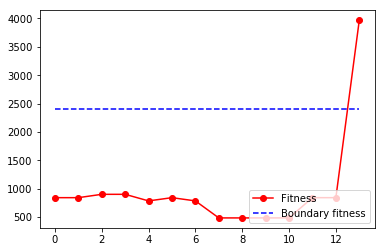

In [649]:
print(generation_counter)
print(fitness_progress)
plt.plot(range(generation_counter+1), fitness_progress, color='red', marker='o', label='Fitness')
plt.plot(range(generation_counter+1), [fitness(X[-1]) for i in range(generation_counter+1)], 
         '--', color='blue', label='Boundary fitness')
plt.legend(loc='lower right')
plt.show()